### 0. Import

##### Setting Route

In [1]:
pwd

'/Users/kangjiwon/Desktop/LG Aimers/phase2_module/workspace/EDA'

In [2]:
cd ../../..

/Users/kangjiwon/Desktop/LG Aimers


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


##### Setting Module

In [4]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pickle

from euqipment import Enquipment

In [5]:
df = pd.read_csv('phase2_module/data/train.csv')
eq = Enquipment(df)

In [6]:
from phase2_module.src.utils.dataset import Data
from phase2_module.src.models.classification.models import Model
from phase2_module.src.base import BasePiepline
# from phase2_module.src.hyper_parameters.params_optimization import xgboost_opt, set_params_optimization_data
from phase2_module.src.utils.set_seed import seed_everything
from phase2_module.src.utils.top_score_instance import check_the_score

from phase2_module.src.utils.manage_pkl_files import PickleManager as pkl_manager
from phase2_module.src import preprocess
seed_everything()  # NOTE: default 42
_model = Model()

In [7]:
import pandas as pd
import numpy as np
import re, pickle
import warnings
from tqdm import tqdm

In [8]:
pkls = pkl_manager.map(pkl_manager.loads, pkl_manager.metadata_directory)

In [39]:
def set_up(mode= None):
    pd.set_option('display.max_columns', mode)
    pd.set_option('display.max_rows', 40000)
set_up()

In [10]:
warnings.filterwarnings('ignore')
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('float_format', '{:.2f}'.format)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 120)

##### Dataframe Load

In [92]:
df = eq.df
raw_df = eq.raw_df()

In [93]:
# 동일한 column 제거
raw_df.drop('customer_country.1', axis=1, inplace=True)
# df_test.drop('customer_country.1', axis=1, inplace=True)

In [94]:
basic = preprocess.Basic

In [95]:
runtime_instance = {
    "Train": raw_df,
    "Instances":[
        {"instance": basic, "method": ['drop_duplicated'], "params": False},
    ]
}
raw_df = preprocess.runner('Train',**runtime_instance)

### 1. Data Analysis

#### **1.1 Columns Analysis**

##### **1.1.1 Column Description**

| Column Name           | Description                                                                                   |
|-----------------------|-----------------------------------------------------------------------------------------------|
| bant_submit           | MQL 구성 요소 중 Budget(예산), Title(고객의 직책/직급), Needs(요구사항), Timeline(희망 납기일)에 대한 값의 비율 |
| customer_country      | 고객의 국적                                                                                    |
| business_unit         | MQL 요청 상품에 대응되는 사업부                                                               |
| com_reg_ver_win_rate  | Vertical Level 1, business unit, region을 기준으로 oppty 비율을 계산                           |
| customer_idx          | 고객의 회사명                                                                                 |
| customer_type         | 고객 유형                                                                                    |
| enterprise            | Global 기업인지, Small/Medium 규모의 기업인지                                                |
| historical_existing_cnt | 이전에 Converted(영업 전환) 되었던 횟수                                                    |
| id_strategic_ver      | 특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여           |
| it_strategic_ver      | 특정 사업부(Business Unit), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여           |
| idit_strategic_ver    | Id_strategic_ver이나 it_strategic_ver 값 중 하나라도 1의 값을 가지면 1 값으로 표현             |
| customer_job          | 고객의 직업군                                                                                 |
| lead_desc_length      | 고객이 작성한 Lead Descriptoin 텍스트 총 길이                                                |
| inquiry_type          | 고객의 문의 유형                                                                              |
| product_category      | 요청 제품 카테고리                                                                            |
| product_subcategory   | 요청 제품 하위 카테고리                                                                       |
| product_modelname     | 요청 제품 모델명                                                                              |
| customer_country.1    | 담당 자사 법인명 기반의 지역 정보(대륙)                                                      |
| customer_position      | 고객의 회사 직책                                                                             |
| response_corporate     | 담당 자사 법인명                                                                             |
| expected_timeline      | 고객의 요청한 처리 일정                                                                      |
| ver_cus               | 특정 Vertical Level 1(사업영역)이면서 Customer_type(고객 유형)이 소비자(End-user)인 경우에 대한 가중치 |
| ver_pro               | 특정 Vertical Level 1(사업영역)이면서 특정 Product Category(제품 유형)인 경우에 대한 가중치           |
| ver_win_rate_x        | 전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 영업 전환 성공 비율 값을 곱한 값 |
| ver_win_ratio_per_bu  | 특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산       |
| business_area         | 고객의 사업 영역                                                                              |
| business_subarea      | 고객의 세부 사업 영역                                                                         |
| lead_owner            | 영업 담당자 이름                                                                              |
| is_converted          | 영업 성공 여부. True일 시 성공.                                                               |


##### **1.1.2 Column Information**

In [96]:
# df.info() # 59298
# df.describe()

In [97]:
eq.is_na(*list(raw_df.columns))

,null
bant_submit,0
business_area,40882
business_subarea,53773
business_unit,0
customer_country,982
customer_idx,0
customer_job,18733
customer_position,0
customer_type,43961
enterprise,0


In [98]:
null_cols = raw_df.columns[raw_df.isnull().any()]

In [99]:
not_null_cols = set(raw_df.columns).difference(set(null_cols))

#### **1.2 Missing Value**

##### **1.2.1  Customer Type**

In [100]:
customer_cols = ['customer_job','customer_position','customer_type']
customer = preprocess.Customer

In [101]:
runtime_instance = {
    "Train": raw_df,
    "Instances":[
        {"instance": customer, "method": ["apply"], "params": pkls.get("customer")},
    ]
}
raw_df = preprocess.runner('Train',**runtime_instance)

In [102]:
raw_df.drop(customer_cols, axis=1, inplace=True)

##### **1.2.2 Country Type**

In [103]:
country_cols = ['customer_country','response_corporate']
country = preprocess.Country

In [104]:
runtime_instance = {
    "Train": raw_df,
    "Instances":[
        {"instance": country, "method": ['apply'], "params": pkls.get("country")},
    ]
}
raw_df = preprocess.runner('Train',**runtime_instance)

In [105]:
raw_df.drop(country_cols, axis=1, inplace=True)

##### **1.2.3 Product Type**

In [106]:
product_cols = ['product_category','product_subcategory','product_modelname']
product_category = preprocess.ProductCategory

In [107]:
runtime_instance = {
    "Train": raw_df,
    "Instances":[
        {"instance": product_category, "method": ["product_categories", 'fill_odds'], "params": {**pkls.get("product_category"), **pkls.get("product_subcategory")}},
    ]
}
raw_df = preprocess.runner('Train',**runtime_instance)

In [108]:
raw_df.drop(product_cols, axis=1, inplace=True)

##### **1.1.4 Inquiry Type**

In [109]:
inquiry_cols = ['inquiry_type','expected_timeline']

In [110]:
inquiry = preprocess.Inquiry

In [111]:
runtime_instance = {
    "Train": raw_df,
    "Instances":[
        {"instance": inquiry, "method": ["apply"], "params": False},
    ]
}
raw_df = preprocess.runner('Train',**runtime_instance)

In [112]:
raw_df.drop(inquiry_cols, axis=1, inplace=True)

-------

##### **1.1.5 History Type**

In [10]:
history_cols = ['historical_existing_cnt']

In [63]:
raw_df['historical_existing_cnt'].fillna(0, inplace=True)

In [ ]:
raw_df['historical_existing_cnt'].loc[raw_df['historical_existing_cnt']!=0]=1
raw_df[['historical_existing_cnt','is_converted']].value_counts().sort_index(ascending=False)

# 0의 True 확률이 더 높음

In [62]:
raw_df.columns

Index(['bant_submit', 'business_unit', 'customer_idx', 'enterprise',
       'historical_existing_cnt', 'lead_desc_length', 'business_area',
       'business_subarea', 'lead_owner', 'is_converted', 'country',
       'continent', 'customer_interest', 'category_1', 'category_2',
       'category_3', 'new_inquiry_type', 'new_expected_timeline',
       'customer_type2', 'job_function', 'seniority_level'],
      dtype='object')

In [64]:
relatived_cols = ['customer_idx', 'lead_owner', 'lead_desc_length', 'customer_type2', 'lead_desc_length','new_inquiry_type','new_expected_timeline']

In [65]:
# customer_idx에 따른 historical_existing_cnt

raw_df['customer_idx'].value_counts()

customer_idx
47466    6853
25096    2404
37680     326
21321     154
18030     122
         ... 
4919        1
20437       1
6697        1
42103       1
13902       1
Name: count, Length: 35090, dtype: int64

In [ ]:
raw_df['customer_idx']

##### **1.1.6 Business Type**

In [19]:
business_cols = ['business_area','business_subarea']

##### 1.1.5 

In [25]:
null_cols

{'business_area', 'business_subarea', 'historical_existing_cnt'}

In [21]:
pwd

'/Users/kangjiwon/Desktop/LG Aimers'

In [22]:
eq.describe_columns(*not_null_cols)

lead_desc_length: 고객이 작성한 Lead Descriptoin 텍스트 총 길이
is_converted: 영업 성공 여부. True일 시 성공.
response_corporate: 담당 자사 법인명
enterprise: Global 기업인지, Small/Medium 규모의 기업인지
customer_idx: 고객의 회사명
customer_position: 고객의 회사 직책
lead_owner: 영업 담당자 이름
business_unit: MQL 요청 상품에 대응되는 사업부
bant_submit: MQL 구성 요소 중 Budget(예산), Title(고객의 직책/직급), Needs(요구사항), Timeline(희망 납기일)에 대한 값의 비율


In [434]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition

X_scaled = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=13)
pca_X = pca.fit_transform(X_scaled)

# 주성분으로 이루어진 데이터 프레임 구성
PAC_df = pd.DataFrame(data=pca_X)

In [435]:
import numpy as np
np.set_printoptions(precision=10, suppress=True)

In [436]:
pca.explained_variance_ratio_

array([0.1832867355, 0.101363386 , 0.088389455 , 0.0853946228,
       0.0777309572, 0.0770999322, 0.0742884259, 0.0703961381,
       0.0660020023, 0.0633528243, 0.0565128713, 0.0294426035,
       0.0267400461])

In [432]:
sum(pca.explained_variance_ratio_)

0.9438173504238992

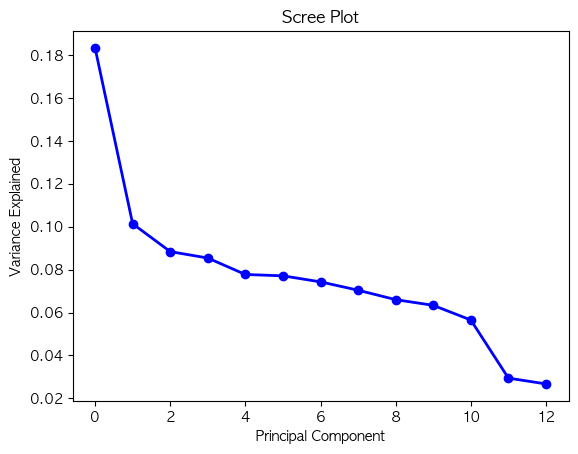

In [424]:
# Scree plot 통해 확인
PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

#### **1.3 Categorization**

##### **1.3.1 Cusomter_idx**

In [113]:
raw_df.columns
relatived_cols = ['enterprise', 'business_area', 'lead_owner', 'country', 'continent', 'new_inquiry_type', 'customer_type2']

In [32]:
new_eq = Enquipment(raw_df)
new_eq.value_counts(*relatived_cols)

############# enterprise ################
enterprise
Enterprise    35629
SMB           20134
Name: count, dtype: int64
2


############# business_area ################
business_area
corporate / office                3990
retail                            2917
hotel & accommodation             1960
special purpose                   1866
residential (home)                1784
education                         1681
hospital & health care            1023
factory                           1014
government department              635
public facility                    503
transportation                     291
power plant / renewable energy     108
Name: count, dtype: int64
12


############# lead_owner ################
lead_owner
174     4563
175     4090
23      2281
97      2275
194     2029
        ... 
1084       1
1085       1
566        1
1086       1
1088       1
Name: count, Length: 983, dtype: int64
983


############# country ################
country
india                          

In [151]:
raw_df['tmp_customer_idx'] = raw_df['customer_idx'].astype(str).str[:1]
raw_df['customer_idx'].astype(str).str[:1].value_counts().sort_values()
# raw_df[['category_1','tmp_customer_idx']].value_counts().sort_index(ascending=False)

customer_idx
5     1012
6     1019
8     1055
9     1098
7     1112
1    10647
3    11545
2    13191
4    15084
Name: count, dtype: int64

-> 다른 Column과 관련되어서 name되지 않음, 단순히 숫자로 범주화 진행

In [130]:
raw_df['customer_idx'].value_counts()

customer_idx
47466    6853
25096    2404
37680     326
21321     154
18030     122
33350      97
33763      88
25309      85
32240      83
37654      75
31864      67
37657      66
19804      64
29370      60
40344      56
21389      49
7195       47
37399      44
42067      40
33776      31
742        28
4936       26
46271      25
33334      23
6555       22
7810       21
21883      21
26780      21
9624       21
16590      21
44254      19
41505      19
31510      18
8750       18
33773      18
41291      18
43395      17
40542      17
37306      16
45319      16
20647      16
40491      16
17224      15
20273      15
15537      15
30207      14
22865      14
9324       14
12193      14
30184      14
26337      14
45625      13
25354      13
37643      13
46458      13
37310      13
21239      13
27735      13
37758      12
23105      12
37757      12
46914      12
39506      12
1747       12
15441      12
310        12
4935       11
29278      11
44333      11
11888      11
4912   